# Case study 10 (Week 15)

## **Description**

***Case Study on Probability for Data Science***

Problem Statement:

To make a suitable machine learning algorithm to predict if the mushroom is edible or poisonous (e or p) using the given dataset. (Along with other ML algorithms, Naïve Bayes’ Classifier should be applied)
Also, if some data pre-processing is necessary do that as well.

Attribute Information:

- cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
- cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s
- cap-colour: brown=n, buff=b, cinnamon=c, Gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y
- bruises: bruises=t, no=f
- odour: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
- gill-attachment: attached=a, descending=d, free=f, notched=n
- gill-spacing: close=c, crowded=w, distant=d
- gill-size: broad=b, narrow=n
- gill-colour: black=k, brown=n, buff=b, chocolate=h, grey=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
- stalk-shape: enlarging=e, tapering=t
- Stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
- stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s
- stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s
- stalk-colour-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
- stalk-colour-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
- veil-type: partial=p, universal=u
- veil-colour: brown=n, orange=o, white=w, yellow=y
- ring-number: none=n, one=o, two=t
- ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
- spore-print-colour: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y
- population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
- habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d 

## 1. Initial Analysis

In [1]:
# Importing Numpy as np
import numpy as np
# Importing pandas as pd
import pandas as pd
#Importing Matplotlibrary's PyPlot as plt
import matplotlib.pyplot as plt
# Importing seaborn as sns
import seaborn as sns
# Importing ScikitLearn
import sklearn

In [18]:
pd.set_option("display.max_columns", None)
# Reading mushroom dataset
mdata=pd.read_csv('mushrooms.csv')
mdata.sample(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7419,p,k,s,n,f,f,f,c,n,b,t,?,k,s,w,p,p,w,o,e,w,v,p
2729,e,x,y,n,t,n,f,c,b,u,t,b,s,s,w,w,p,w,o,p,n,y,d
2038,e,x,s,g,f,n,f,w,b,n,t,e,s,s,w,w,p,w,o,e,k,a,g
736,e,x,f,w,t,a,f,w,n,w,t,b,s,s,w,w,p,w,o,p,n,v,d
5364,p,f,s,g,t,f,f,c,b,h,t,b,s,f,w,w,p,w,o,p,h,s,u


In [6]:
mdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
mdata.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [8]:
mdata.isna().sum().to_frame('Null value count')

,Null value count
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


### Early Insights :
* This Dataframe contains the details of different parameters (23 Category) of Mushrooms.
* No null values.
* All the columns are in Object Data type

## 2. Pre-Processing

In [19]:
# Getting a list of column names from feature dataframe which are suitable for label encoding
cols = []
for i in list(mdata.columns):
    if mdata[i].dtype == 'O' :
        cols.append(i)
        
print('The below given list of columns needs a Label Encoding:\n',cols)

The below given list of columns needs a Label Encoding:
 ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [20]:
# Creating a label encoded dataframe of the targeted columns with the help of LabelEncoder from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder
Label_Enc= LabelEncoder()
temp_df=pd.DataFrame()
temp_df2=pd.DataFrame()
for k in cols:
    l=mdata[k].values
    l=Label_Enc.fit_transform(l)
    temp_df2=pd.DataFrame(l, columns=[str(k)])
    temp_df = pd.concat([temp_df, temp_df2], axis=1)

In [21]:
# Replacing the original columns in the feature dataframe with encoded columns
import warnings
warnings.filterwarnings("ignore")
mdata[cols]=temp_df[cols]
# Sample preview of the feature dataframe
mdata.sample(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
3274,1,5,0,9,0,2,1,0,0,7,0,1,1,1,6,0,0,2,1,2,1,5,1
6939,1,3,2,2,0,8,1,0,1,0,1,0,1,1,7,7,0,2,1,0,7,4,2
1717,0,5,3,8,1,3,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,3
4168,1,5,3,3,0,2,1,0,0,3,0,1,1,1,6,4,0,2,1,2,1,4,1
6517,0,5,0,3,0,5,1,1,0,7,0,0,2,1,7,7,0,2,2,4,7,2,1


## 3. Preparing the Dataframe for Model creation

In [22]:
# Splitting the Dataframe into
# Features
X = mdata.drop(['class'], axis=1)
# Target
y = mdata['class']

In [23]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

## 4. Testing the Impact of different Models

Choosen Models :
1. Logistic Regression
2. KNN Classifier
3. Decision Tree Classifier
4. Gradient Boosting Classifier
5. Naive Bayes' Gaussian & Bernoulli Classifiers

### 1. Logistic Regression

In [24]:
import warnings
warnings.filterwarnings('ignore')
# Importing LogisticRegression from sklearn.linear_model as LR
from sklearn.linear_model import LogisticRegression as LR
LR_Model=LR()
LR_Model.fit(X_train, y_train)
# Predicting the values using Test data
y_pred=LR_Model.predict(X_test)

In [25]:
# Importing confusion_matrix from sklearn.metrics as CM
from sklearn.metrics import confusion_matrix as CM
# Importing classification_report from sklearn.metrics as CR
from sklearn.metrics import classification_report as CR
# Final status of the predictions made by the Logistic Regression Classifier
print(CR(y_test , y_pred))
print('Confusion matrix of the model is:\n',CM(y_test, y_pred))
# Accuracy score
# Importing accuracy_score from sklearn.metrics as ASC
from sklearn.metrics import accuracy_score as ASC
print('Accuracy score of the given model is',ASC(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       843
           1       0.94      0.95      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625

Confusion matrix of the model is:
 [[798  45]
 [ 41 741]]
Accuracy score of the given model is 0.947076923076923


### 2. KNN Classifier

In [29]:
# Importing KNeighborsClassifier from sklearn.neighbors as KNC
from sklearn.neighbors import KNeighborsClassifier as KNC
Accuracy_range=[]
N_range=np.arange(2,15)
for i in N_range:
    KModel=KNC(n_neighbors=i)
    KModel.fit(X_train,y_train)
    y_pred=KModel.predict(X_test)
    Accuracy_range.append(ASC(y_test,y_pred))

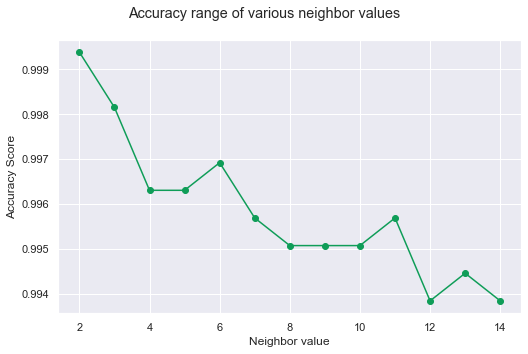

In [30]:
f, ax = plt.subplots(figsize=(7.5, 5))
f.suptitle('Accuracy range of various neighbor values')
sns.set_theme()
plt.plot( N_range, Accuracy_range, marker='o', color='#0F9D58')
plt.xlabel('Neighbor value')
plt.ylabel('Accuracy Score')
f.tight_layout()
plt.show()

> Selecting optimal neighbor value as '2'

In [31]:
KModel=KNC(n_neighbors=2)
KModel.fit(X_train,y_train)
y_pred=KModel.predict(X_test)

In [33]:
# Final status of the predictions made by the KNN Classifier
print(CR(y_pred, y_test))
print('Confusion matrix of the model is:\n',CM(y_test, y_pred))
# Accuracy score
print('Accuracy score of the given model is',ASC(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion matrix of the model is:
 [[842   1]
 [  0 782]]
Accuracy score of the given model is 0.9993846153846154


### 3. Decision Tree Classifier

In [34]:
# Importing SVC from sklearn.tree as DTC
from sklearn.tree import DecisionTreeClassifier as DTC
DTCModel = DTC()
DTCModel.fit(X_train,y_train)
y_pred = DTCModel.predict(X_test)

In [35]:
# Final status of the predictions made by the Decision trees Classifier
print(CR(y_test , y_pred))
print('Confusion matrix of the model is:\n',CM(y_test, y_pred))
# Accuracy score
print('Accuracy score of the given model is',ASC(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion matrix of the model is:
 [[843   0]
 [  0 782]]
Accuracy score of the given model is 1.0


### 4. Gradient Boosting Classifier

In [36]:
# Finding the best fit Parameter for GBC
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
parameter_grid = dict(n_estimators=np.array([50,100,200,300,400]))
GBModel = GradientBoostingRegressor(random_state=42)
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
grid = GridSearchCV(estimator=GBModel, param_grid=parameter_grid, scoring='r2', cv=kfold)
grid_result = grid.fit(X_train, y_train)
Means = grid_result.cv_results_['mean_test_score']
Stds = grid_result.cv_results_['std_test_score']
Parameters = grid_result.cv_results_['params']
for mean, stdev, param in zip(Means, Stds, Parameters):
    print("R2 Score","%f (%f) with: %r" % (mean, stdev, param))

print("Perfect out of them: %f paired with %s" % (grid_result.best_score_, grid_result.best_params_))

R2 Score 0.980384 (0.008401) with: {'n_estimators': 50}
R2 Score 0.991568 (0.003715) with: {'n_estimators': 100}
R2 Score 0.996888 (0.001722) with: {'n_estimators': 200}
R2 Score 0.998368 (0.000762) with: {'n_estimators': 300}
R2 Score 0.998988 (0.000480) with: {'n_estimators': 400}
Perfect out of them: 0.998988 paired with {'n_estimators': 400}


In [39]:
from sklearn.metrics import r2_score
model = GradientBoostingRegressor(random_state=42, n_estimators=400)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print ("R Squared value of our valuation is:", r2_score(y_test, y_pred))

R Squared value of our valuation is: 0.9994472307522657


### 5. Naive Bayes' Gaussian & Bernoulli Classifiers

In [40]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

#### 1. Gaussian

In [41]:
GNC = GaussianNB()
GNC.fit(X_train,y_train)
y_pred = GNC.predict(X_test)

In [42]:
# Final status of the predictions made by the Gaussian NBC
print(CR(y_test , y_pred))
print('Confusion matrix of the model is:\n',CM(y_test, y_pred))
# Accuracy score
print('Accuracy score of the given model is',ASC(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       843
           1       0.91      0.93      0.92       782

    accuracy                           0.92      1625
   macro avg       0.92      0.92      0.92      1625
weighted avg       0.92      0.92      0.92      1625

Confusion matrix of the model is:
 [[771  72]
 [ 55 727]]
Accuracy score of the given model is 0.9218461538461539


#### 2. Bernoulli

In [43]:
BNC = BernoulliNB()
BNC.fit(X_train,y_train)
y_pred = BNC.predict(X_test)

In [44]:
# Final status of the predictions made by the Bernoulli NBC
print(CR(y_test , y_pred))
print('Confusion matrix of the model is:\n',CM(y_test, y_pred))
# Accuracy score
print('Accuracy score of the given model is',ASC(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86       843
           1       0.93      0.73      0.82       782

    accuracy                           0.84      1625
   macro avg       0.86      0.84      0.84      1625
weighted avg       0.86      0.84      0.84      1625

Confusion matrix of the model is:
 [[797  46]
 [211 571]]
Accuracy score of the given model is 0.8418461538461538


## **Summary:**

Model  | Accuracy score
------------------------------------------|-------------------|
Logistic Regression | 0.9471 |
KNN Classifier | 0.9994 |
Decision Tree Classifier | 1.0000 |
Gradient Boosting Classifier | 0.9994 |
Naive Bayes' Gaussian Classifier | 0.9218 |
Naive Bayes' Bernoulli Classifier | 0.8418 |

Out of the above 6 Models **Decision Tree Classifier Model** shown a much better performance than the other 5 Models.

**End of the file reached!**